<a href="https://colab.research.google.com/github/flapperz/NLP_2021/blob/main/MIDTERM/midterm_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ppalineee/LST20.git

Cloning into 'LST20'...
remote: Enumerating objects: 4761, done.
remote: Counting objects: 100% (4761/4761), done.
remote: Compressing objects: 100% (243/243), done.
remote: Total 4761 (delta 4518), reused 4761 (delta 4518), pack-reused 0
Receiving objects: 100% (4761/4761), 16.91 MiB | 36.23 MiB/s, done.
Resolving deltas: 100% (4518/4518), done.


In [1]:
import pandas as pd
import csv
import numpy as np
import os
import matplotlib.pyplot as plt

# Load Data

In [2]:
df_genre = pd.read_csv('LST20_Corpus/genres.txt',sep="\t",skip_blank_lines=False, names=["fname","genre"], quoting=csv.QUOTE_NONE)

In [3]:

def dir2df(dirname):
    col_names = ["fname", "word", "POS","NER","CLAUSE"]
    df = pd.DataFrame(columns=col_names)
    l = []
    for fname in os.listdir(dirname):
        df_tmp = pd.read_csv('{}/{}'.format(dirname, fname),sep="\t",skip_blank_lines=False, names=["word", "POS","NER","CLAUSE"], quoting=csv.QUOTE_NONE)
        df_tmp.loc[:,'fname'] = fname
        l.append(df_tmp)
    return pd.concat(l)
# df1 = 
# df2 = pd.read_csv('LST20_Corpus/eval/T01608.txt',sep="\t",skip_blank_lines=False, names=["word", "POS","NER","CLAUSE"], quoting=csv.QUOTE_NONE)

df_eval = dir2df('LST20_Corpus/eval')
df_test = dir2df('LST20_Corpus/test')
df_train = dir2df('LST20_Corpus/train')

In [4]:
print('lenght train',len(df_train.groupby('fname').count()))
print('lenght test',len(df_test.groupby('fname').count()))
print('lenght eval',len(df_eval.groupby('fname').count()))

lenght train 3794
lenght test 483
lenght eval 474


# EDA

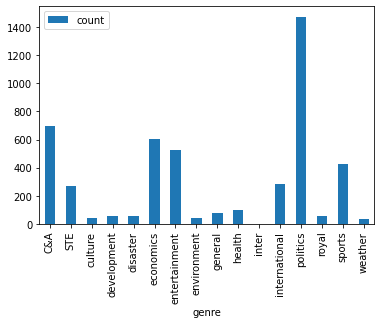

num class 16


In [9]:
df_genre_mod = df_genre
df_genre_mod.loc[:,"count"] = 1
df_genre_mod.groupby('genre').count().plot.bar(y="count")
plt.show()
print('num class',len(df_genre_mod.genre.unique()))

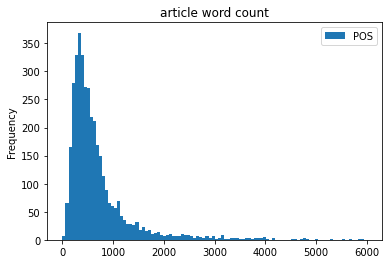

In [10]:
df_train.groupby('fname').count().plot.hist(y="POS", bins=100,range=[0,6000])
plt.title("article word count")
plt.show()

# Preprocessing

In [ ]:
!pip install pythainlp
!pip install deepcut
!pip install attacut

In [6]:
df_test.loc[df_test.fname == 'T13340.txt','word'].values

array(['มท.', '2', '_', 'ปัด', 'ขน', 'คน', 'เข้า', 'กรุง', 'เพื่อ',
       'ก่อกวน', 'เสื้อ', 'แดง', nan, 'รมช.', 'มหาดไทย', '"', 'บุญจง',
       '"', '_', 'ปัด', 'ขน', 'คน', 'เข้า', 'กรุง', '_', 'เพื่อ',
       'ก่อกวน', 'เสื้อ', 'แดง', '_', 'พร้อม', 'เชื่อ', '_', 'จะ', 'ไม่',
       'มี', 'เหตุ', 'ปะทะ', 'กัน', nan, 'นาย', 'บุญจง', '_',
       'วงศ์ไตรรัตน์', '_', 'รมช.', 'มหาดไทย', '_', 'ยืนยัน', 'ไม่',
       'มีการ', 'ว่าจ้าง', '_', 'หรือ', '_', 'ขน', 'คน', 'มา', 'ป่วน',
       'กลุ่ม', 'คน', 'เสื้อ', 'แดง', 'ที่', 'เตรียม', 'ยื่น', 'ถวาย',
       'ฎีกา', 'ขอ', 'พระราชทาน', 'อภัยโทษ', 'ให้', '_', 'พ.ต.ท.',
       'ทักษิณ', '_', 'ชินวัตร', '_', 'อดีต', 'นายก', 'ฯ', nan, 'ขณะ',
       'เดียว', 'กัน', '_', 'ก็', 'ไม่', 'ได้', 'มีการ', 'สกัดกั้น',
       'การ', 'เดินทาง', 'เข้า', '_', 'กรุงเทพฯ', 'ของ', 'คน', 'เสื้อ',
       'แดง', 'ด้วย', nan, 'ขณะ', 'เดียว', 'กัน', '_', 'ก็', 'ไม่', 'ได้',
       'รู้สึก', 'กังวล', '_', 'พ.ต.ท.', 'ทักษิณ', 'โฟนอิน', '_', 'เพราะ',
       'โฟน', 'เป็น

In [7]:
genres = df_genre.genre.unique()
genre2idx = {}
for i,g in enumerate(genres):
    genre2idx[g] = i
print(genre2idx)

{'politics': 0, 'C&A': 1, 'general': 2, 'economics': 3, 'culture': 4, 'STE': 5, 'international': 6, 'environment': 7, 'weather': 8, 'health': 9, 'disaster': 10, 'entertainment': 11, 'development': 12, 'sports': 13, 'royal': 14, 'inter': 15}


In [8]:
def get_data(df):
    xs = []
    ys = []
    for fname in df.fname.unique():
        x = ''.join([str(x) if x != '_' else ' ' for x in df.loc[df.fname == fname,'word'].fillna(' ').values])
        y = genre2idx[df_genre.loc[df_genre.fname == fname,'genre'].values[0]]

        xs.append(x)
        ys.append(y)
    return xs,ys

data_train, y_train = get_data(df_train)
data_val, y_val = get_data(df_eval)
data_test, y_test = get_data(df_test)

print('train', len(data_train), len(y_train))
print('test', len(data_val), len(y_test))
print('val', len(data_val), len(y_val))


train 3794 3794
test 474 483


NameError: ignored

In [9]:
display(data_test[:2])
display(y_test[:2])

['ชาวอเมริกัน 6 ใน 10 เชื่อไข้หวัดใหญ่สายพันธุ์ใหม่ 2009 ระบาดในฤดูใบไม้ร่วง ผลการสำรวจความคิดเห็นชาวอเมริกันกว่า 1,800 คน โดยฮาร์วาร์ด สคูล ออฟ พับลิค เฮลท์ ปลายเดือนที่แล้ว พบว่า กลุ่มตัวอย่าง 6 ใน 10 เชื่อว่า เชื้อไข้หวัดใหญ่สายพันธุ์ใหม่ 2009 จะแพร่ระบาดไปทั่วประเทศ และจะมีผู้ป่วยรุนแรงในสหรัฐ ในฤดูใบไม้ร่วงนี้ โดยกลุ่มผู้สูงอายุเป็นกลุ่มที่เชื่อว่า จะล้มป่วยมากที่สุด ขณะบราซิลรายงานว่า ยอดผู้เสียชีวิตจากไข้หวัดใหญ่สายพันธุ์ใหม่ 2009 ในประเทศ เพิ่มขึ้นเป็น 11 คน ด้านซูดาน รายงานว่า พบผู้ติดเชื้อไข้หวัดใหญ่สายพันธุ์ใหม่ 2009 รายแรกของประเทศแล้ว โดยเป็นพลเรือนที่เพิ่งเดินทางกลับจากอังกฤษ. ',
 'ผบช.น.แถลงข่าวจับโจรจี้แท็กซี่ พล.ต.ท.วรพงษ์ ชิวปรีชา ผบช.น. แถลงข่าวผลงานของ สน.มักกะสัน จับกุม นายเดชฤทธิ์ ใจดี อายุ 24 ปี อยู่บ้านเลขที่ 52 หมู่ 4 ต.ตาลาน อ.ผักไห่ จ.อยุธยา โจรชิงทรัพย์แท็กซี่ หลังตระเวนก่อเหตุล่อลวงโชเฟอร์แท็กซี่ไปชิงทรัพย์โดยใช้อาวุธปืน พร้อมของกลาง อาวุธปืนพกสั้น ขนาด มม. กระสุน 4 นัด โทรศัพท์มือถือ เงินสด 900 บาท รถแท็กซี่ ทะเบียน ทล 5480 กทม. และป้ายทะเบียนปลอม หมายเลข 

[9, 1]

In [10]:
from pythainlp import word_tokenize
from attacut import tokenize as atta_tokenize

x_train_mm = [word_tokenize(x,engine='newmm') for x in data_train]
x_train_ac = [atta_tokenize(x) for x in data_train]
x_test_mm = [word_tokenize(x,engine='newmm') for x in data_test]
x_test_ac = [atta_tokenize(x) for x in data_test]
x_val_mm = [word_tokenize(x,engine='newmm') for x in data_val]
x_val_ac = [atta_tokenize(x) for x in data_val]


In [11]:
print(x_train_ac[:2])

[['กกต.', 'โต้วุฒิสภา', 'ไม่', 'มี', 'สิทธิ', 'สั่ง', 'ทบทวน', 'ส.ว.', 'ถือ', 'หุ้น', 'สัมปทาน', ' ', '"', 'สดศรี', '"', 'เผย', 'กกต.', 'เหมือน', 'อัยการ', ' ', 'ประธาน', 'วุฒิสภา', 'แค่', 'ไปรษณีย์', 'ส่ง', 'ให้', 'ศาลรธน', '.', 'ชี้ขาด', ' ', 'ย้อน', 'ทำไม', 'ยื้อส่ง', ' ', 'ส.ว.', 'ปราจีน', 'พ้น', 'สมาชิก', 'ภาพ', ' ', 'ปธ.', 'วุฒิสภา', 'ยัน', 'สอย', 'ส.ว.', '-', 'ส.ส.', ' ', 'ที่', 'สำนักงานคณะกรรมการการเลือกตั้ง', '(', 'กกต.', ')', ' ', 'นางสดศรี สัตยธรรม', ' ', 'กกต.', 'ด้าน', 'กิจการ', 'พรรค', 'การ', 'เมือง', ' ', 'กล่าว', 'ถึง', 'กรณี', 'ที่', 'ประธาน', 'วุฒิสภา', 'เสนอ', 'ให้', ' ', 'กกต.', 'ทบทวน', 'มติ', 'เรื่อง', 'ส.ส.', 'ถือ', 'ครอง', 'หุ้น', 'สัมปทาน', 'รัฐ', ' ', 'ขัด', 'รัฐธรรมนูญ', 'ต้อง', 'พ้น', 'สมาชิกภาพ', ' ', 'อยาก', 'ถาม', 'ว่า', ' ', 'เป็น', 'อดีต', 'ตุลาการ', 'มา', 'แล้ว', 'ท่าน', 'ใช้', 'กฎหมาย', 'หรือ', 'รัฐธรรมนูญ', 'มาตรา', 'ใด', 'ให้', ' ', 'กกต.', 'ทบทวน', ' ', 'เป็น', 'รัฐธรรมนูญ', 'ฉบับ', 'ปี', ' ', '2575', ' ', 'หรือ', 'เปล่า', ' ', '"', 'ท่าน', 'เหมือ

In [12]:
vocab_mm = set()
vocab_ac = set()
for x in x_train_mm:
    vocab_mm.update(x)
for x in x_train_ac:
    vocab_ac.update(x)
vocab_mm = list(vocab_mm)
vocab_ac = list(vocab_ac)

print('#vocab_mm', len(vocab_mm))
print('#vocab_dc', len(vocab_ac))

#vocab_mm 35826
#vocab_dc 64796


In [13]:
wordmm2idx = {w:idx for idx,w in enumerate(vocab_mm)}
worddc2idx = {w:idx for idx,w in enumerate(vocab_ac)}

# Classification

## Naive-Bayes

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from time import time

def naive_bayes_classifier(train, test):
    train_data = train
    test_data = test

    # set data
    xs_train = []
    xs_test = []
    ys_train = y_train
    for x in train_data:
        xs_train.append(','.join(list(filter(lambda w: w != ' ', x))))
    for x in test_data:
        xs_test.append(','.join(list(filter(lambda w: w != ' ', x))))

    # train
    t0 = time()
    
    cvec = CountVectorizer(analyzer=lambda x:x.split(','))
    c_feat = cvec.fit_transform(xs_train)

    tvec = TfidfVectorizer(analyzer=lambda x:x.split(','),)
    xs_train_tf  = tvec.fit_transform(xs_train)

    naive_bayes_classifier = MultinomialNB()
    naive_bayes_classifier.fit(xs_train_tf, y_train)

    t1 = time()
    print('train time', t1-t0)

    # result on train

    y_train_pred = naive_bayes_classifier.predict(xs_train_tf)
    score1 = metrics.accuracy_score(y_train, y_train_pred)
    print("train accuracy:   %0.3f" % score1)

    # predict

    xs_test_tf = tvec.transform(xs_test)

    t0 = time()
    y_pred = naive_bayes_classifier.predict(xs_test_tf)

    t1 = time()

    score1 = metrics.accuracy_score(y_test, y_pred)
    print("accuracy:   %0.3f" % score1)

    print(metrics.classification_report(y_test, y_pred,
                                                target_names=genres))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))

    print('test time', t1-t0)

In [118]:
naive_bayes_classifier(x_train_mm, x_test_mm)

train time 1.693019151687622
train accuracy:   0.612
accuracy:   0.557
               precision    recall  f1-score   support

     politics       0.41      1.00      0.59       148
          C&A       0.96      0.64      0.77        70
      general       0.00      0.00      0.00         8
    economics       0.89      0.28      0.42        61
      culture       0.00      0.00      0.00         5
          STE       0.00      0.00      0.00        28
international       0.00      0.00      0.00        29
  environment       0.00      0.00      0.00         5
      weather       0.00      0.00      0.00         4
       health       0.00      0.00      0.00        10
     disaster       0.00      0.00      0.00         6
entertainment       1.00      0.57      0.72        53
  development       0.00      0.00      0.00         6
       sports       0.97      0.67      0.79        43
        royal       0.00      0.00      0.00         6
        inter       0.00      0.00      0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
naive_bayes_classifier(x_train_ac, x_test_ac)

train time 1.8765032291412354
train accuracy:   0.449
accuracy:   0.404
               precision    recall  f1-score   support

     politics       0.34      1.00      0.51       148
          C&A       1.00      0.44      0.61        70
      general       0.00      0.00      0.00         8
    economics       1.00      0.03      0.06        61
      culture       0.00      0.00      0.00         5
          STE       0.00      0.00      0.00        28
international       0.00      0.00      0.00        29
  environment       0.00      0.00      0.00         5
      weather       0.00      0.00      0.00         4
       health       0.00      0.00      0.00        10
     disaster       0.00      0.00      0.00         6
entertainment       1.00      0.17      0.29        53
  development       0.00      0.00      0.00         6
       sports       1.00      0.12      0.21        43
        royal       0.00      0.00      0.00         6
        inter       0.00      0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive-Bayes Character

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from time import time

def naive_bayes_classifier(train, test):
    train_data = train
    test_data = test

    # set data
    xs_train = []
    xs_test = []
    ys_train = y_train
    for x in train_data:
        xs_train.append(''.join(list(filter(lambda w: w != ' ', x))))
    for x in test_data:
        xs_test.append(''.join(list(filter(lambda w: w != ' ', x))))

    # train
    t0 = time()
    
    cvec = CountVectorizer(analyzer=lambda x:list(x))
    c_feat = cvec.fit_transform(xs_train)

    tvec = TfidfVectorizer(analyzer=lambda  x:list(x))
    xs_train_tf  = tvec.fit_transform(xs_train)

    naive_bayes_classifier = MultinomialNB()
    naive_bayes_classifier.fit(xs_train_tf, y_train)

    t1 = time()
    print('train time', t1-t0)

    # result on train

    y_train_pred = naive_bayes_classifier.predict(xs_train_tf)
    score1 = metrics.accuracy_score(y_train, y_train_pred)
    print("train accuracy:   %0.3f" % score1)

    # predict

    xs_test_tf = tvec.transform(xs_test)

    t0 = time()
    y_pred = naive_bayes_classifier.predict(xs_test_tf)

    t1 = time()

    score1 = metrics.accuracy_score(y_test, y_pred)
    print("accuracy:   %0.3f" % score1)

    print(metrics.classification_report(y_test, y_pred,
                                                target_names=genres))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))

    print('test time', t1-t0)

In [81]:
naive_bayes_classifier(x_train_mm, x_test_mm)

train time 3.6067955493927
train accuracy:   0.319
accuracy:   0.308
               precision    recall  f1-score   support

     politics       0.31      0.99      0.47       148
          C&A       0.00      0.00      0.00        70
      general       0.00      0.00      0.00         8
    economics       0.00      0.00      0.00        61
      culture       0.00      0.00      0.00         5
          STE       0.50      0.04      0.07        28
international       0.00      0.00      0.00        29
  environment       0.00      0.00      0.00         5
      weather       0.00      0.00      0.00         4
       health       0.00      0.00      0.00        10
     disaster       0.00      0.00      0.00         6
entertainment       0.67      0.04      0.07        53
  development       0.00      0.00      0.00         6
       sports       0.00      0.00      0.00        43
        royal       0.00      0.00      0.00         6
        inter       0.00      0.00      0.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
naive_bayes_classifier(x_train_ac, x_test_ac)

train time 3.579693555831909
train accuracy:   0.319
accuracy:   0.308
               precision    recall  f1-score   support

     politics       0.31      0.99      0.47       148
          C&A       0.00      0.00      0.00        70
      general       0.00      0.00      0.00         8
    economics       0.00      0.00      0.00        61
      culture       0.00      0.00      0.00         5
          STE       0.50      0.04      0.07        28
international       0.00      0.00      0.00        29
  environment       0.00      0.00      0.00         5
      weather       0.00      0.00      0.00         4
       health       0.00      0.00      0.00        10
     disaster       0.00      0.00      0.00         6
entertainment       0.67      0.04      0.07        53
  development       0.00      0.00      0.00         6
       sports       0.00      0.00      0.00        43
        royal       0.00      0.00      0.00         6
        inter       0.00      0.00      0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## BoW Dnn

In [14]:
import numpy as np

In [15]:
def doc2features(x, vocab):
    feat = np.zeros(len(vocab))
    for wi in x:
        if wi in wordmm2idx:
            feat[wordmm2idx[wi]] += 1
    return feat
print(sum(doc2features(x_train_mm[0], vocab_mm)))
print(len(x_train_mm[0]))

1281.0
1281


In [83]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking, SimpleRNN, LeakyReLU, Flatten
from tensorflow.keras.optimizers import Adam

In [36]:
def preparedata(xs,ys, vocab):
    xs_res = [doc2features(x, vocab) for x in xs]
    ys_res = [np.eye(len(genres))[y] for y in ys]
    return xs_res, ys_res

In [77]:
from time import time
tf.keras.backend.clear_session()

def getBOWDNN(vocab):
    len_feat = len(vocab)
    inputs = Input(shape=(len_feat,), dtype='int32')
    # x = Dense(128, activation=lambda x : tf.nn.leaky_relu(x, alpha=0.01))(inputs)
    x = Dense(256, activation='sigmoid')(inputs)

    x = Dropout(0.2)(x)   
    x = Dense(128, activation='sigmoid')(x)
    x = Dropout(0.2)(x)  
    # x = Dense(64,activation=lambda x : tf.nn.leaky_relu(x, alpha=0.01))(x)
    x = Dense(64, activation='sigmoid')(x)
    x = Dropout(0.2)(x) 
    out = Dense(len(genres), activation='softmax')(x)

    model = Model(inputs, out)
    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model

xs_train, ys_train = preparedata(x_train_mm, y_train, vocab_mm)

xs_train = np.array(xs_train)
ys_train = np.array(ys_train)


model = getBOWDNN(vocab_mm)
model.summary()
t0 = time()
model.fit(xs_train,y=ys_train, batch_size=16, epochs=9, verbose=1)
t1 = time()
print('train time', t1-t0)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 35826)]           0         
_________________________________________________________________
dense (Dense)                (None, 256)               9171712   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0     

In [79]:
from sklearn import metrics
xs_test, ys_test = preparedata(x_test_mm, y_test, vocab_mm)
t0 = time()
y_pred = model.predict(np.array(xs_test))
t1 = time()
print('test time', t1-t0)
y_pred = y_pred.argmax(axis=1)
print(metrics.classification_report(y_test, y_pred, target_names=genres))

test time 0.13697361946105957
               precision    recall  f1-score   support

     politics       0.80      0.97      0.88       148
          C&A       0.92      0.93      0.92        70
      general       0.00      0.00      0.00         8
    economics       0.69      0.57      0.62        61
      culture       1.00      0.20      0.33         5
          STE       0.59      0.71      0.65        28
international       0.83      0.83      0.83        29
  environment       0.80      0.80      0.80         5
      weather       1.00      0.25      0.40         4
       health       0.40      0.40      0.40        10
     disaster       1.00      0.17      0.29         6
entertainment       0.92      0.91      0.91        53
  development       0.25      0.17      0.20         6
       sports       0.95      0.91      0.93        43
        royal       1.00      0.50      0.67         6
        inter       0.00      0.00      0.00         1

     accuracy                    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
from time import time
tf.keras.backend.clear_session()

def getBOWDNN(vocab):
    len_feat = len(vocab)
    inputs = Input(shape=(len_feat,), dtype='int32')
    # x = Dense(128, activation=lambda x : tf.nn.leaky_relu(x, alpha=0.01))(inputs)
    x = Dense(256, activation='sigmoid')(inputs)

    x = Dropout(0.2)(x)   
    x = Dense(128, activation='sigmoid')(x)
    x = Dropout(0.2)(x)  
    # x = Dense(64,activation=lambda x : tf.nn.leaky_relu(x, alpha=0.01))(x)
    x = Dense(64, activation='sigmoid')(x)
    x = Dropout(0.2)(x) 
    out = Dense(len(genres), activation='softmax')(x)

    model = Model(inputs, out)
    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model

xs_train, ys_train = preparedata(x_train_ac, y_train, vocab_ac)

xs_train = np.array(xs_train)
ys_train = np.array(ys_train)


model = getBOWDNN(vocab_ac)
model.summary()
t0 = time()
model.fit(xs_train,y=ys_train, batch_size=16, epochs=9, verbose=1)
t1 = time()
print('train time', t1-t0)

from sklearn import metrics
xs_test, ys_test = preparedata(x_test_ac, y_test, vocab_ac)
t0 = time()
y_pred = model.predict(np.array(xs_test))
t1 = time()
print('test time', t1-t0)
y_pred = y_pred.argmax(axis=1)
print(metrics.classification_report(y_test, y_pred, target_names=genres))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64796)]           0         
_________________________________________________________________
dense (Dense)                (None, 256)               16588032  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


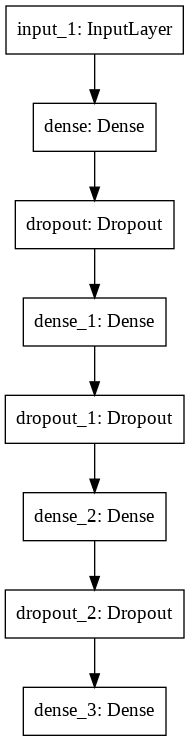

In [86]:
from tensorflow.keras.utils import plot_model
plot_model(model)